In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Строить 

In [3]:
df = pd.read_csv('./data/flat.csv', sep = '\t')
print(df.shape)
df.head()

(2040, 11)


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


# Доверительные интервалы для среднего

95% доверительный интервал для средней стоймости квартиры.

Точный доверительный интервал для средней стоймости квартиры.

Предположение:
    В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ)

In [5]:
# руками
norm_rv = stats.norm()
alpha = 0.05
z_crit = norm_rv.ppf(1-alpha/2)

mu_hat = df.price.mean()
var_hat = df.price.var(ddof=1) #ddof = 1 - n-1 в знаменателе дисперсии
n = df.price.count()
border = z_crit*np.sqrt(var_hat/n)
left = mu_hat - border
right = mu_hat + border

print('Доверительный интервал [{:.4};{:.4}] ширины {:.4}'.format(left, right, right-left))

Доверительный интервал [125.2;129.7] ширины 4.502


In [6]:
# библиотекой
mu_hat = df.price.mean()
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

stats.norm.interval(1-alpha, loc=mu_hat, scale=sd_hat)


(125.24534794254012, 129.74778931236185)

# Точный доверительный интервал

In [7]:
#стюдент - выборка пришла из нормального распределения и дисперсия неизвестна
#руками
t_rv = stats.t(n-1)
alpha = 0.05
t_crit = t_rv.ppf(1-alpha/2)
print(t_crit)

mu_hat = df.price.mean()
var_hat = df.price.var(ddof=1) #ddof = 1 - n-1 в знаменателе дисперсии
n = df.price.count()
border = t_crit*np.sqrt(var_hat/n)
left = mu_hat - border
right = mu_hat + border

print('Доверительный интервал [{:.4};{:.4}] ширины {:.4}'.format(left, right, right-left))
#Ширина похожая, т.к. наблюдений много

1.9611281121033441
Доверительный интервал [125.2;129.7] ширины 4.505


In [7]:
#библиотекой
n = df.price.count()
num_hat = df.price.mean()
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

left, right = stats.t.interval(0.95, df=(n-1), loc=mu_hat, scale=sd_hat)
print('Доверительный интервал [{:.4};{:.4}] ширины {:.4}'.format(left, right, right-left))

Доверительный интервал [125.2;129.7] ширины 4.505


# Построить 99% точные доверительные интервалы для всех районов

In [11]:
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])
df_agg

,mean,std,count
code,,,
1,134.411765,49.619507,272
2,110.316279,29.518448,215
3,148.246377,70.573565,345
4,148.693780,73.656832,209
5,115.779762,31.507483,336
6,109.964981,32.976595,257
7,114.230088,33.897495,226
8,136.744444,48.639263,180


In [20]:
alpha = 0.01
df_agg['t_crit'] = df_agg['count'].apply(lambda w: stats.t(w-1).ppf(1-alpha/2))
df_agg['border'] = df_agg['t_crit'] * df_agg['std']/np.sqrt(df_agg['count'])

df_agg

,mean,std,count,t_crit,step,border
code,,,,,,
1,134.411765,49.619507,272,2.594092,7.804650,7.804650
2,110.316279,29.518448,215,2.598998,5.232150,5.232150
3,148.246377,70.573565,345,2.590197,9.841589,9.841589
4,148.693780,73.656832,209,2.599672,13.245198,13.245198
5,115.779762,31.507483,336,2.590585,4.452889,4.452889
6,109.964981,32.976595,257,2.595170,5.338326,5.338326
7,114.230088,33.897495,226,2.597856,5.857718,5.857718
8,136.744444,48.639263,180,2.603574,9.438884,9.438884


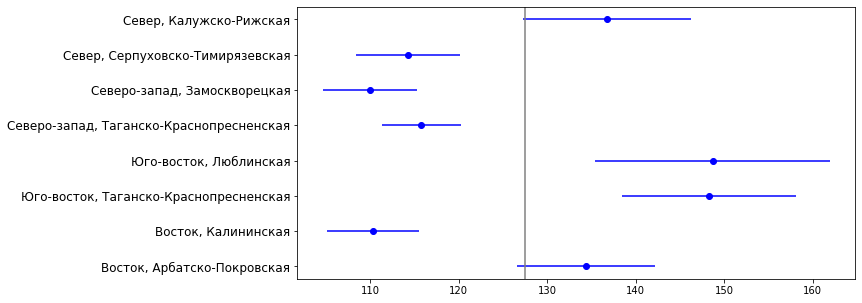

In [24]:
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 'Северо-запад, Замоскворецкая',
    'Северо-запад, Таганско-Краснопресненская', 'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калининская', 'Восток, Арбатско-Покровская'
]

center = df_agg['mean'].values
border = df_agg['border'].values

mu_hat = df.price.mean()
plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size), xerr=border, capsize=0, fmt='o', color='blue')
plt.yticks(np.arange(center.size-1, -1, -1), district, fontsize=12);
plt.axvline(mu_hat, 0, color='grey')

In [ ]:
f